In [1]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

$$f(x_1,x_2) = x_1^2+ x_2^2$$

In [2]:
def f(x):
    return x[:,0]**2 + x[:,1]**2

In [3]:
def f1(x,y):
    return x**2+y**2

In [4]:
a = np.array([[1,2],[3,4],[5,6]])

In [5]:
a

array([[1, 2],
       [3, 4],
       [5, 6]])

In [6]:
f(a)

array([ 5, 25, 61])

In [7]:
for x,y in a:
    print(f1(x,y))

5
25
61


In [8]:
x = np.random.uniform([-10],[10], size = (1000,2))

In [9]:
x.shape

(1000, 2)

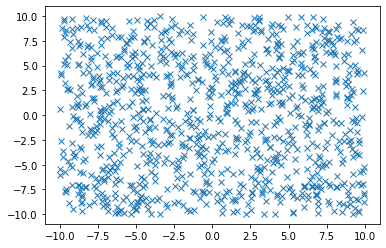

In [10]:
plt.plot(x[:,0],x[:,1],'x')
plt.show()

In [11]:
y = f(x)

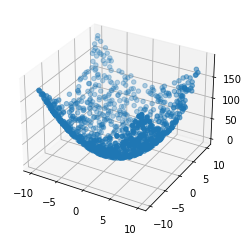

In [12]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x[:,0], x[:,1], y)

In [13]:
W = np.array([[0.1,0.15],[0.21,0.12]])
b  = np.array([0,0])
W_hut = np.array([0.11,0.18])

$$\hat{y} = \hat{W}_1h_1 + \hat{W}_2h_2$$

$$h_1 = \sigma(z_1)$$
$$h_2 = \sigma(z_2)$$

$$z_1 = W_{11}x_1 + W_{12}x_2 + b_1$$
$$z_2 = W_{21}x_1 + W_{22}x_2 +b_2$$

$$\sigma(x) =\frac{1}{1+e^{-x}}$$

In [14]:
def sigma(x):
    return 1/(1+np.exp(-x))

In [15]:
def forward_loop(x_list):
    results = []
    for x in x_list:
        z1 = W[0,0]*x[0]+W[0,1]*x[1]+b[0]
        z2 = W[1,0]*x[0]+W[1,1]*x[1]+b[1]
        h1 = sigma(z1)
        h2 = sigma(z2)
        y_hat = W_hut[0]*h1+W_hut[1]*h2
        results.append(y_hat)
    return results

In [16]:
def forward(x):
    z = W.dot(x.T).T + b
    h = sigma(z).T
    y_hat = W_hut.dot(h)
    return y_hat

In [17]:
y_hat = forward(x)
y_hat.shape

(1000,)

In [18]:
y_hat_test = forward_loop(x)

In [19]:
y_hat[:3]

array([0.26623835, 0.19224917, 0.21794274])

In [20]:
y_hat_test[:3]

[0.2662383450098426, 0.19224917214599924, 0.21794274007192854]

In [21]:
start = datetime.now()

In [22]:
print(datetime.now() - start)

0:00:00.002736


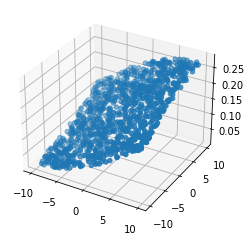

In [23]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x[:,0], x[:,1], y_hat)